# DRY BEAN CLASS PREDICTION

importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ml specific imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# algorithm
# linear classfication
from sklearn.linear_model import LogisticRegression
# tree classfication
from sklearn.tree import DecisionTreeClassifier
# neighbour classification
from sklearn.neighbors import KNeighborsClassifier
# naive bayes classification
from sklearn.naive_bayes import GaussianNB
# support vection machine classification
from sklearn.svm import SVC
# ensemble
from sklearn.ensemble import RandomForestClassifier

load the dataset and explore it

In [9]:
df = pd.read_csv('../data/Dry_Bean_Dataset.csv')
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [8]:
df.info()

NameError: name 'df' is not defined

In [4]:
df.isnull().sum() 

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

make the target column as numerical

In [5]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df['Class'])

get all the features

In [6]:
X = df.drop('Class', axis=1) # features

pipelines for prediction

In [7]:
X.shape

(13611, 16)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
# 1. Logistic Regression
k = 10
clf1 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', LogisticRegression(solver='saga'))
])
# 2. Decision Tree
clf2 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', DecisionTreeClassifier())
])
# 3. Nearest Neighbors
clf3 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', KNeighborsClassifier())
])
# 4. Gaussian Naive Bayes
clf4 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', GaussianNB())
])

# 5. Support Vector Machine
clf5 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', SVC())
])

# 6. Random Forest
clf6 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', RandomForestClassifier())
])

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)
# train the model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

c:\Users\ZAID\miniconda3\envs\mlbatch24\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x00000146D7BF8540>)),
                ('classification', RandomForestClassifier())])

In [10]:
ypred1 = clf1.predict(X_test)
ypred2 = clf2.predict(X_test)
ypred3 = clf3.predict(X_test)
ypred4 = clf4.predict(X_test)
ypred5 = clf5.predict(X_test)
ypred6 = clf6.predict(X_test)

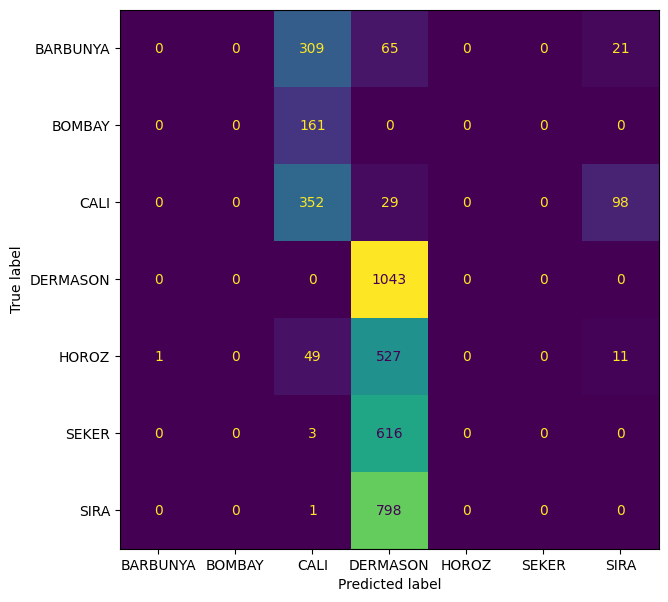

In [11]:
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred1), 
    display_labels=enc.classes_
).plot(ax=ax, colorbar=False)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
print("LOGISTIC REGRESSION")
print('---'*20)
print(classification_report(y_test, ypred1, target_names=enc.classes_))

LOGISTIC REGRESSION
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       395
      BOMBAY       0.00      0.00      0.00       161
        CALI       0.40      0.73      0.52       479
    DERMASON       0.34      1.00      0.51      1043
       HOROZ       0.00      0.00      0.00       588
       SEKER       0.00      0.00      0.00       619
        SIRA       0.00      0.00      0.00       799

    accuracy                           0.34      4084
   macro avg       0.11      0.25      0.15      4084
weighted avg       0.13      0.34      0.19      4084



In [14]:
print("DECISION TREE CLF")
print('---'*20)
print(classification_report(y_test, ypred2, target_names=enc.classes_))

DECISION TREE CLF
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.79      0.84      0.81       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.85      0.82      0.83       479
    DERMASON       0.87      0.88      0.88      1043
       HOROZ       0.94      0.90      0.92       588
       SEKER       0.90      0.89      0.90       619
        SIRA       0.80      0.80      0.80       799

    accuracy                           0.86      4084
   macro avg       0.88      0.88      0.88      4084
weighted avg       0.87      0.86      0.86      4084



In [15]:
print("SUPPORT VECTOR CLF")
print('---'*20)
print(classification_report(y_test, ypred5, target_names=enc.classes_))

SUPPORT VECTOR CLF
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.47      0.06      0.11       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.59      0.88      0.70       479
    DERMASON       0.76      0.84      0.80      1043
       HOROZ       0.61      0.59      0.60       588
       SEKER       0.41      0.25      0.31       619
        SIRA       0.57      0.75      0.64       799

    accuracy                           0.63      4084
   macro avg       0.63      0.62      0.60      4084
weighted avg       0.61      0.63      0.60      4084



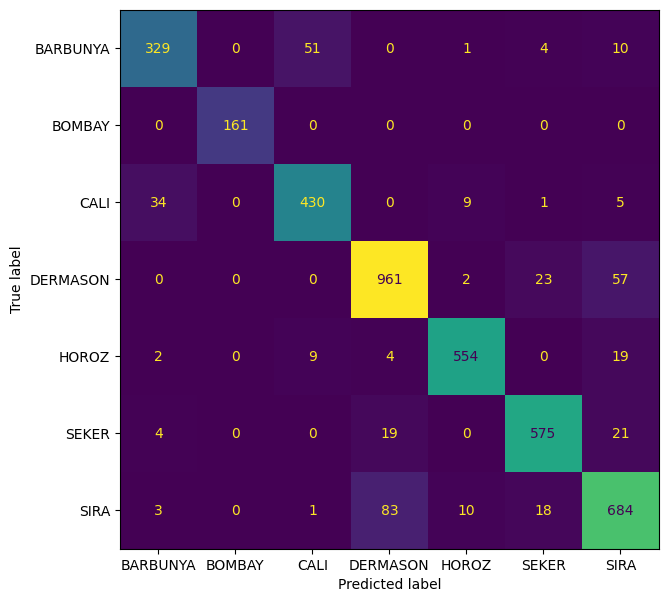

In [16]:
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred6), 
    display_labels=enc.classes_
).plot(ax=ax, colorbar=False)

In [17]:
# save the model, encoder
import joblib
joblib.dump(clf6, 'saved_model.pkl')
joblib.dump(enc, 'saved_encoder.pkl')

['saved_encoder.pkl']

10 march 2024

In [10]:
import joblib
import gradio as gr

In [24]:
def predict_input(
    area, perimeter, majoraxislength,
    minoraxislength, aspectration, eccentricity,
    convexarea, equivdiameter, extent, solidity, 
    roundness, compactness, shapefactor1,
    shapefactor2, shapefactor3, shapefactor4
):
    data = {'Area': area,
        'Perimeter': perimeter,
        'MajorAxisLength': majoraxislength,
        'MinorAxisLength': minoraxislength,
        'AspectRation': aspectration,
        'Eccentricity': eccentricity,
        'ConvexArea': convexarea,
        'EquivDiameter': equivdiameter,
        'Extent': extent,
        'Solidity': solidity,
        'roundness': roundness,
        'Compactness': compactness,
        'ShapeFactor1': shapefactor1,
        'ShapeFactor2': shapefactor2,
        'ShapeFactor3':shapefactor3,
        'ShapeFactor4': shapefactor4
    }
    X_inp = pd.DataFrame([data])            # create a dataframe
    clf = joblib.load('saved_model.pkl')    # load the model
    enc = joblib.load('saved_encoder.pkl')  # load the encoder
    y_pred = clf.predict(X_inp)             # predict the class
    # print(y_pred, enc.inverse_transform(y_pred)[0])
    return enc.inverse_transform(y_pred)[0] # bean class name

trick to get the list of all parameters for the function when you have a lot of parameters

In [25]:
print(", ".join(df.columns.tolist()).lower())

area, perimeter, majoraxislength, minoraxislength, aspectration, eccentricity, convexarea, equivdiameter, extent, solidity, roundness, compactness, shapefactor1, shapefactor2, shapefactor3, shapefactor4, class


In [26]:
# test the function X.iloc[0].todict()
data = {'Area': 28395.0,
 'Perimeter': 1000.291,
 'MajorAxisLength': 608.1781167,
 'MinorAxisLength': 173.888747,
 'AspectRation': 1.197191424,
 'Eccentricity': 0.549812187,
 'ConvexArea': 28715.0,
 'EquivDiameter': 190.1410973,
 'Extent': 0.763922518,
 'Solidity': 0.988855999,
 'roundness': 0.858027126,
 'Compactness': 0.913357755,
 'ShapeFactor1': 0.007331506,
 'ShapeFactor2': 0.003147289,
 'ShapeFactor3': 0.834222388,
 'ShapeFactor4': 0.998723889
}


# simplest version for Gradio ui

In [31]:
ui = gr.Interface(
    predict_input,
    inputs = [
        gr.Number(label='Area'),
        gr.Number(label='Perimeter', step=.01),
        gr.Number(label='MajorAxisLength', step=.01),
        gr.Number(label='MinorAxisLength', step=.01),
        gr.Number(label='AspectRation', step=.01),
        gr.Number(label='Eccentricity', step=.01),
        gr.Number(label='ConvexArea'),
        gr.Number(label='EquivDiameter', step=.01),
        gr.Number(label='Extent', step=.01),
        gr.Number(label='Solidity', step=.01),
        gr.Number(label='roundness', step=.01),
        gr.Number(label='Compactness', step=.01),
        gr.Number(label='ShapeFactor1', step=.01),
        gr.Number(label='ShapeFactor2', step=.01),
        gr.Number(label='ShapeFactor3', step=.01),
        gr.Number(label='ShapeFactor4', step=.01)
    ],
    outputs = 'text',
    title = "Dry Bean Classification",
    examples=df.iloc[:5].values.tolist()
)
ui.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
